## loading the case with caseid 164 from the table ln_tbl_case_v3 along with its annotated argument component type labels for each sentence.

In [1]:
import pandas as pd
import csv

df = pd.DataFrame(columns = ['case_id', 'sentence','component_type'])
with open("/home/ubuntu/large_models_senti/data/new_data/test_two_set_cases_benchmark_graph_nodes_1.csv") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    count = 0
    for line in csvreader:
      case_id = line[0]
      sentence = line[1]
      component_type = line[2]
      df = df.append({'case_id': case_id, 'sentence': sentence, 'component_type': component_type}, ignore_index=True)
      count += 1



In [2]:
graph_df_gen_1 = df[df.case_id == '164'].reset_index(drop=True)
graph_df_gen_1

,case_id,sentence,component_type
0,164,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others
1,164,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others
2,164,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others
3,164,"Prasenjit Mandal, J.: This application is at t...",Premise
4,164,The plaintiffs/opposite parties herein institu...,Premise
5,164,In the suit the defendant/petitioner herein en...,Premise
6,164,That application was rejected by the impugned ...,Claim
7,164,"Being aggrieved, the defendant has preferred t...",Claim
8,164,Having heard the learned Counsel for the parti...,Premise
9,164,The petitioners have contended that Hari Mohan...,Premise


In [23]:
graph_df_gen_1.to_csv('actual_component_type_164.csv')

## Without considering the argument types, predicting relations between all sentences for the graph

In [3]:
from simpletransformers.classification import ClassificationModel
roberta_model = ClassificationModel("roberta", "saved_model/roberta/",use_cuda=False, num_labels=3)

In [4]:
gen_test_df = pd.DataFrame(columns = ['text_a', 'cat1', 'text_b', 'cat2', 'labels'])

for index1,row1  in graph_df_gen_1.iterrows():
    for index2,row2 in graph_df_gen_1.iterrows():
        if row1['sentence'] != row2['sentence']:
            gen_test_df = gen_test_df.append({'text_a': row1['sentence'],'cat1': row1['component_type'], 'text_b': row2['sentence'], 'cat2': row2['component_type'], 'labels':'ndr'}, ignore_index=True)

gen_test_df.head()

,text_a,cat1,text_b,cat2,labels
0,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others,ndr
1,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others,ndr
2,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Prasenjit Mandal, J.: This application is at t...",Premise,ndr
3,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,The plaintiffs/opposite parties herein institu...,Premise,ndr
4,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,In the suit the defendant/petitioner herein en...,Premise,ndr


In [5]:
label_map = {}
label_map['Attack'] = 0
label_map['ndr'] = 1
label_map['Support'] = 2
gen_test_df['labels'] = gen_test_df['labels'].apply(lambda x:label_map[x])

gen_test_df

,text_a,cat1,text_b,cat2,labels
0,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others,1
1,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others,1
2,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Prasenjit Mandal, J.: This application is at t...",Premise,1
3,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,The plaintiffs/opposite parties herein institu...,Premise,1
4,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,In the suit the defendant/petitioner herein en...,Premise,1
...,...,...,...,...,...
1555,"Urgent xerox certified copy of this order, if ...",Others,"Therefore, the learned Trial Judge, in my view...",Claim,1
1556,"Urgent xerox certified copy of this order, if ...",Others,Evidence is required to determine this issue,Claim,1
1557,"Urgent xerox certified copy of this order, if ...",Others,"In my opinion, the learned Trial Judge has rig...",Others,1
1558,"Urgent xerox certified copy of this order, if ...",Others,Accordingly this application is devoid of meri...,Claim,1


In [6]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

#result, model_outputs, wrong_predictions = roberta_model.eval_model(eval_df=gen_test_df, f1=f1_multiclass, acc=accuracy_score, confusion_matrix = confusion_matrix, cr = classification_report)
list_rows = []
for index, row in gen_test_df.iterrows():
    list_row= []
    list_row.append(row['text_a'])
    list_row.append(row['text_b'])
    list_rows.append(list_row)
    
outputs , _ = roberta_model.predict(list_rows)

#model_outputs
outputs

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
len(outputs)

1560

In [35]:
print(type(model_outputs))

<class 'numpy.ndarray'>


In [36]:
model_output_list = model_outputs.tolist()
model_output_list

[[-5.077627182006836, 8.125310897827148, -3.5992517471313477],
 [-5.149911880493164, 8.16448974609375, -3.5792224407196045],
 [-4.605639934539795, 8.139494895935059, -4.17214298248291],
 [-4.955687522888184, 8.09043025970459, -3.754708766937256],
 [-4.96959114074707, 8.145435333251953, -3.7899670600891113],
 [-4.832594871520996, 8.286384582519531, -4.006463050842285],
 [-4.743040084838867, 8.030844688415527, -3.8203587532043457],
 [-4.7791852951049805, 8.309898376464844, -4.0770158767700195],
 [-4.397336483001709, 8.316980361938477, -4.412502288818359],
 [-4.665703773498535, 8.361818313598633, -4.206595420837402],
 [-4.708163261413574, 8.34396743774414, -4.156885147094727],
 [-4.734182357788086, 8.349088668823242, -4.149377822875977],
 [-4.62955904006958, 8.334318161010742, -4.221187591552734],
 [-4.599719524383545, 8.305205345153809, -4.257733345031738],
 [-4.811819076538086, 8.303532600402832, -4.01633358001709],
 [-5.149334907531738, 8.21563720703125, -3.6409881114959717],
 [-5.2685

In [37]:
print(len(model_output_list))

1560


In [8]:
def find_max_val_index_in_3(list_d):
    count= 0
    max_val = list_d[0]
    max_index = 0
    for item in list_d:
        if item > max_val:
            max_val = item
            max_index = count
        count += 1
    return max_index

In [46]:
gen_test_df['labels_val'] = [find_max_val_index_in_3(list_d) for list_d in model_output_list]
    

In [47]:
gen_test_df

,text_a,cat1,text_b,cat2,labels,labels_val,labels_generated
0,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others,1,1,ndr
1,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others,1,1,ndr
2,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Prasenjit Mandal, J.: This application is at t...",Premise,1,1,ndr
3,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,The plaintiffs/opposite parties herein institu...,Premise,1,1,ndr
4,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,In the suit the defendant/petitioner herein en...,Premise,1,1,ndr
...,...,...,...,...,...,...,...
1555,"Urgent xerox certified copy of this order, if ...",Others,"Therefore, the learned Trial Judge, in my view...",Claim,1,1,ndr
1556,"Urgent xerox certified copy of this order, if ...",Others,Evidence is required to determine this issue,Claim,1,1,ndr
1557,"Urgent xerox certified copy of this order, if ...",Others,"In my opinion, the learned Trial Judge has rig...",Others,1,1,ndr
1558,"Urgent xerox certified copy of this order, if ...",Others,Accordingly this application is devoid of meri...,Claim,1,1,ndr


In [48]:
gen_test_df['relation_type'] = ['supports' if x == 2 else 'attacks' if x == 0 else 'ndr' for x in gen_test_df.labels_val]

In [9]:
gen_test_df['relation_type'] = ['supports' if x == 2 else 'attacks' if x == 0 else 'ndr' for x in outputs]

In [10]:
gen_test_df

,text_a,cat1,text_b,cat2,labels,relation_type
0,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others,1,ndr
1,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others,1,ndr
2,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,"Prasenjit Mandal, J.: This application is at t...",Premise,1,ndr
3,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,The plaintiffs/opposite parties herein institu...,Premise,1,ndr
4,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others,In the suit the defendant/petitioner herein en...,Premise,1,ndr
...,...,...,...,...,...,...
1555,"Urgent xerox certified copy of this order, if ...",Others,"Therefore, the learned Trial Judge, in my view...",Claim,1,ndr
1556,"Urgent xerox certified copy of this order, if ...",Others,Evidence is required to determine this issue,Claim,1,ndr
1557,"Urgent xerox certified copy of this order, if ...",Others,"In my opinion, the learned Trial Judge has rig...",Others,1,ndr
1558,"Urgent xerox certified copy of this order, if ...",Others,Accordingly this application is devoid of meri...,Claim,1,ndr


In [11]:
gen_test_df.relation_type.value_counts()

ndr         1392
supports     168
Name: relation_type, dtype: int64

In [12]:
import networkx as nx
G = nx.DiGraph()
count = 0
for index, row in graph_df_gen_1.iterrows():
  G.add_node(count) 
  G.nodes[count]["sentence"]=row['sentence']
  G.nodes[count]["component_type"]=row['component_type']
  count += 1 

print(G.number_of_nodes())

40


In [53]:
relation_label_list = []
for list_d in model_output_list:
    max_index = find_max_val_index_in_3(list_d)
    if max_index == 0:
        label = 'attacks'
    elif max_index == 2:
        label = 'supports'
    else:
        label ='ndr'
    relation_label_list.append(label)

In [13]:
relation_label_list = []
for item in outputs:
    if item == 0:
        label = 'attacks'
    elif item == 2:
        label = 'supports'
    else:
        label ='ndr'
    relation_label_list.append(label)

In [14]:
list_of_dict = []
count = 0
for i in range(0,G.number_of_nodes()):
    for j in range(0,G.number_of_nodes()):
        if i!= j:
            list_of_dict.append({"sentence1_index": i, "sentence2_index": j,"relation_type": relation_label_list[count] })
            count += 1
            
print(list_of_dict)

[{'sentence1_index': 0, 'sentence2_index': 1, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 2, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 3, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 4, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 5, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 6, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 7, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 8, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 9, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 10, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 11, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 12, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 13, 'relation_type': 'ndr'}, {'sentence1_index': 0, 'sentence2_index': 14, 'relation_type': 'ndr'}, {'sentence1_in

In [15]:
for dict_edge in list_of_dict:
    if dict_edge['relation_type'] != 'ndr':
        G.add_edge(dict_edge['sentence1_index'],dict_edge['sentence2_index'])
        G[dict_edge['sentence1_index']][dict_edge['sentence2_index']]['relation_type']= dict_edge['relation_type']

In [16]:
from networkx.algorithms.approximation.vertex_cover import min_weighted_vertex_cover
vertext_cover_set = min_weighted_vertex_cover(G)
print(min_weighted_vertex_cover(G))

{0, 1, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 21, 22, 23, 24, 27, 28, 29, 34, 35, 36, 37, 38, 39}


In [17]:
vetex_cover_list=list(vertext_cover_set)
vetex_cover_list

[0,
 1,
 4,
 5,
 6,
 7,
 9,
 11,
 12,
 13,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 27,
 28,
 29,
 34,
 35,
 36,
 37,
 38,
 39]

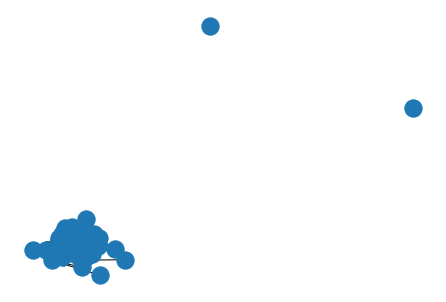

In [15]:
import matplotlib.pyplot as plt
nx.draw(G)

In [18]:
sub_graph_1 = G.subgraph(vetex_cover_list)


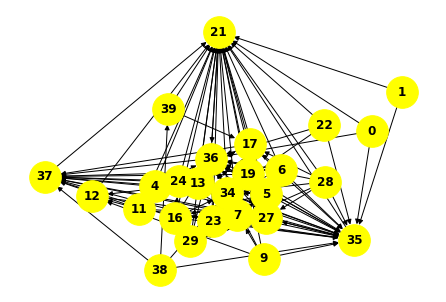

In [81]:
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 1,
    'font_weight':'bold',
    'with_labels': True
}

nx.draw(sub_graph_1,**options )
plt.savefig("No_AC_graph.png")

In [20]:
#from networkx.DiGraph import in_degree
sorted_node_list = []

for vertex in vertext_cover_set:
  #print("node"+str(vertex))
  in_degree_val = G.in_degree(vertex)
  #print(G.in_degree(vertex))
  sorted_node_list.append({"node_index": vertex, "in_dgree_val" : in_degree_val}) 

sorted_node_list = sorted(sorted_node_list, key = lambda x: x['in_dgree_val'],reverse=True)
print(sorted_node_list)

[{'node_index': 21, 'in_dgree_val': 36}, {'node_index': 35, 'in_dgree_val': 28}, {'node_index': 36, 'in_dgree_val': 24}, {'node_index': 37, 'in_dgree_val': 16}, {'node_index': 34, 'in_dgree_val': 15}, {'node_index': 17, 'in_dgree_val': 12}, {'node_index': 7, 'in_dgree_val': 11}, {'node_index': 27, 'in_dgree_val': 8}, {'node_index': 12, 'in_dgree_val': 4}, {'node_index': 16, 'in_dgree_val': 3}, {'node_index': 29, 'in_dgree_val': 2}, {'node_index': 4, 'in_dgree_val': 1}, {'node_index': 5, 'in_dgree_val': 1}, {'node_index': 23, 'in_dgree_val': 1}, {'node_index': 24, 'in_dgree_val': 1}, {'node_index': 39, 'in_dgree_val': 1}, {'node_index': 0, 'in_dgree_val': 0}, {'node_index': 1, 'in_dgree_val': 0}, {'node_index': 6, 'in_dgree_val': 0}, {'node_index': 9, 'in_dgree_val': 0}, {'node_index': 11, 'in_dgree_val': 0}, {'node_index': 13, 'in_dgree_val': 0}, {'node_index': 19, 'in_dgree_val': 0}, {'node_index': 22, 'in_dgree_val': 0}, {'node_index': 28, 'in_dgree_val': 0}, {'node_index': 38, 'in_d

In [19]:
fh = open("test_no_AC.edgelist", "wb")
nx.write_edgelist(sub_graph_1, fh)

In [114]:
count = 0
all_hypothesis_2 = []
while count <= int(0.25*G.number_of_nodes()):
    print("sentence")
    sentenceObject = G.nodes[sorted_node_list[count]['node_index']]
    sentence = sentenceObject['sentence']
    component_type = sentenceObject['component_type']
    all_hypothesis_2.append(sentence)
    print(sentence+ "   "+component_type)
    count += 1

sentence
The Trial Court must see that the bogus litigation can be shot down   Premise
sentence
Evidence is required to determine this issue   Claim
sentence
In my opinion, the learned Trial Judge has rightly addressed the issue   Others
sentence
Accordingly this application is devoid of merits and is, therefore, dismissed   Claim
sentence
Therefore, the learned Trial Judge, in my view, has rightly observed that it is not possible to hold whether the suit is barred by the law of limitation or not   Claim
sentence
So, this application has been preferred   Claim
sentence
Being aggrieved, the defendant has preferred this application   Claim
sentence
Fraud is to be decided on the basis of evidence   Claim
sentence
Thus, the plaintiffs became the owners of the property left by Hari Mohan   Claim
sentence
Thereafter, the defendant filed the said application which was rejected by the impugned order   Premise
sentence
Mr. Mukherjee has also drawn my attention of the annotated book of evidence 

In [22]:
count = 0
while count < len(sorted_node_list):
    print("sentence")
    sentenceObject = G.nodes[sorted_node_list[count]['node_index']]
    sentence = sentenceObject['sentence']
    component_type = sentenceObject['component_type']
    print(sentence+ "   "+component_type)
    count += 1

sentence
The Trial Court must see that the bogus litigation can be shot down   Premise
sentence
Evidence is required to determine this issue   Claim
sentence
In my opinion, the learned Trial Judge has rightly addressed the issue   Others
sentence
Accordingly this application is devoid of merits and is, therefore, dismissed   Claim
sentence
Therefore, the learned Trial Judge, in my view, has rightly observed that it is not possible to hold whether the suit is barred by the law of limitation or not   Claim
sentence
So, this application has been preferred   Claim
sentence
Being aggrieved, the defendant has preferred this application   Claim
sentence
Fraud is to be decided on the basis of evidence   Claim
sentence
Thus, the plaintiffs became the owners of the property left by Hari Mohan   Claim
sentence
Thereafter, the defendant filed the said application which was rejected by the impugned order   Premise
sentence
Mr. Mukherjee has also drawn my attention of the annotated book of evidence 

In [115]:
all_hypothesis_2

['The Trial Court must see that the bogus litigation can be shot down',
 'Evidence is required to determine this issue',
 'In my opinion, the learned Trial Judge has rightly addressed the issue',
 'Accordingly this application is devoid of merits and is, therefore, dismissed',
 'Therefore, the learned Trial Judge, in my view, has rightly observed that it is not possible to hold whether the suit is barred by the law of limitation or not',
 'So, this application has been preferred',
 'Being aggrieved, the defendant has preferred this application',
 'Fraud is to be decided on the basis of evidence',
 'Thus, the plaintiffs became the owners of the property left by Hari Mohan',
 'Thereafter, the defendant filed the said application which was rejected by the impugned order',
 'Mr. Mukherjee has also drawn my attention of the annotated book of evidence by S.P. Sengupta to the effect that the element of fraud is to be decided on evidence only']

## Considering the argument types generted by Argument component classification model, predicting relations between all sentences for the graph

In [30]:
graph_df_gen_2 = pd.DataFrame(columns = ['case_id', 'sentence','component_type'])
with open("/home/ayan_chandra/vaartani_ayan/large_models_senti/data/new_data/graph_df_gen_2.csv") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    count = 0
    for line in csvreader:
        if count != 0:
            case_id = line[0]
            sentence = line[1]
            component_type = line[2]
            graph_df_gen_2 = graph_df_gen_2.append({'case_id': case_id, 'sentence': sentence, 'component_type': component_type}, ignore_index=True)
        count += 1

In [31]:
graph_df_gen_2 = graph_df_gen_2.reset_index(drop=True)

In [32]:
graph_df_gen_2

,case_id,sentence,component_type
0,164,Cases referred to:27 CWN 587;Kanailal Das vs ...,Others
1,164,P. Chengalvaraya Naidu (Dead) by LRS vs Jaga...,Others
2,164,"Arivandandam vs T. V. Satyapal, AIR 1977 SC ...",Others
3,164,"Prasenjit Mandal, J.: This application is at t...",Others
4,164,The plaintiffs/opposite parties herein institu...,Others
5,164,In the suit the defendant/petitioner herein en...,Others
6,164,That application was rejected by the impugned ...,Premise
7,164,"Being aggrieved, the defendant has preferred t...",Others
8,164,Having heard the learned Counsel for the parti...,Premise
9,164,The petitioners have contended that Hari Mohan...,Premise


In [33]:
graph_df_gen_2.component_type.value_counts()

Premise       18
Others        17
Claim          4
MajorClaim     1
Name: component_type, dtype: int64

In [34]:
gen_test_df_2 = pd.DataFrame(columns = ['text_a', 'cat1', 'text_b', 'cat2', 'labels'])

for index1,row1  in graph_df_gen_2.iterrows():
    for index2,row2 in graph_df_gen_2.iterrows():
        if row1['sentence'] != row2['sentence']:
            if (row1['component_type'] == 'Premise' and row2['component_type'] == 'Claim') or (row1['component_type'] == 'Premise' and row2['component_type'] == 'MajorClaim') or (row1['component_type'] == 'Claim' and row2['component_type'] == 'MajorClaim') or (row1['component_type'] == 'Premise' and row2['component_type'] == 'Premise'):
                gen_test_df_2 = gen_test_df_2.append({'text_a': row1['sentence'],'cat1': row1['component_type'], 'text_b': row2['sentence'], 'cat2': row2['component_type'], 'labels':'ndr'}, ignore_index=True)

gen_test_df_2

,text_a,cat1,text_b,cat2,labels
0,That application was rejected by the impugned ...,Premise,Having heard the learned Counsel for the parti...,Premise,ndr
1,That application was rejected by the impugned ...,Premise,The petitioners have contended that Hari Mohan...,Premise,ndr
2,That application was rejected by the impugned ...,Premise,He had no issue and so his brother Moni Mohan ...,Premise,ndr
3,That application was rejected by the impugned ...,Premise,"Thus, the plaintiffs became the owners of the ...",Premise,ndr
4,That application was rejected by the impugned ...,Premise,The defendant has no connection with Hari Moha...,Premise,ndr
...,...,...,...,...,...
395,Accordingly this application is devoid of meri...,Premise,"In the instant case, there being a contention ...",Premise,ndr
396,Accordingly this application is devoid of meri...,Premise,"Therefore, the learned Trial Judge, in my view...",Claim,ndr
397,Accordingly this application is devoid of meri...,Premise,"In my opinion, the learned Trial Judge has rig...",MajorClaim,ndr
398,Accordingly this application is devoid of meri...,Premise,"Considering the circumstances, there will be n...",Claim,ndr


In [35]:
list_rows_2 = []
for index, row in gen_test_df_2.iterrows():
    list_row= []
    list_row.append(row['text_a'])
    list_row.append(row['text_b'])
    list_rows_2.append(list_row)
    
outputs_2 , _ = roberta_model.predict(list_rows_2)

#model_outputs
outputs_2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [36]:
len(outputs_2)

400

In [37]:
gen_test_df_2['relation_type'] = ['supports' if x == 2 else 'attacks' if x == 0 else 'ndr' for x in outputs_2]

In [38]:
gen_test_df_2

,text_a,cat1,text_b,cat2,labels,relation_type
0,That application was rejected by the impugned ...,Premise,Having heard the learned Counsel for the parti...,Premise,ndr,ndr
1,That application was rejected by the impugned ...,Premise,The petitioners have contended that Hari Mohan...,Premise,ndr,ndr
2,That application was rejected by the impugned ...,Premise,He had no issue and so his brother Moni Mohan ...,Premise,ndr,ndr
3,That application was rejected by the impugned ...,Premise,"Thus, the plaintiffs became the owners of the ...",Premise,ndr,ndr
4,That application was rejected by the impugned ...,Premise,The defendant has no connection with Hari Moha...,Premise,ndr,ndr
...,...,...,...,...,...,...
395,Accordingly this application is devoid of meri...,Premise,"In the instant case, there being a contention ...",Premise,ndr,ndr
396,Accordingly this application is devoid of meri...,Premise,"Therefore, the learned Trial Judge, in my view...",Claim,ndr,ndr
397,Accordingly this application is devoid of meri...,Premise,"In my opinion, the learned Trial Judge has rig...",MajorClaim,ndr,ndr
398,Accordingly this application is devoid of meri...,Premise,"Considering the circumstances, there will be n...",Claim,ndr,ndr


In [39]:
gen_test_df_2.relation_type.value_counts()

ndr         361
supports     39
Name: relation_type, dtype: int64

In [40]:
import networkx as nx
G2 = nx.DiGraph()
count = 0
for index, row in graph_df_gen_2.iterrows():
    G2.add_node(count) 
    G2.nodes[count]["sentence"]=row['sentence']
    G2.nodes[count]["component_type"]=row['component_type']
    count += 1 

print(G2.number_of_nodes())

40


In [41]:
relation_label_list_2 = []
for item in outputs_2:
    if item == 0:
        label = 'attacks'
    elif item == 2:
        label = 'supports'
    else:
        label ='ndr'
    relation_label_list_2.append(label)

In [42]:
list_of_dict_2 = []
count = 0
for index1, row1  in graph_df_gen_2.iterrows():
    for index2, row2 in graph_df_gen_2.iterrows():
        if row1['sentence'] != row2['sentence']:
            if (row1['component_type'] == 'Premise' and row2['component_type'] == 'Claim') or (row1['component_type'] == 'Premise' and row2['component_type'] == 'MajorClaim') or (row1['component_type'] == 'Claim' and row2['component_type'] == 'MajorClaim') or (row1['component_type'] == 'Premise' and row2['component_type'] == 'Premise'):
                list_of_dict_2.append({"sentence1_index": index1, "sentence2_index": index2,"relation_type": relation_label_list_2[count] })
                count += 1
            
print(list_of_dict_2)


[{'sentence1_index': 6, 'sentence2_index': 8, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 9, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 10, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 12, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 13, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 14, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 15, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 16, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 18, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 19, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 20, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 22, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 23, 'relation_type': 'ndr'}, {'sentence1_index': 6, 'sentence2_index': 24, 'relation_type': 'ndr'}, {'sente

In [43]:
for dict_edge in list_of_dict_2:
    if dict_edge['relation_type'] != 'ndr':
        G2.add_edge(dict_edge['sentence1_index'],dict_edge['sentence2_index'])
        G2[dict_edge['sentence1_index']][dict_edge['sentence2_index']]['relation_type']= dict_edge['relation_type']

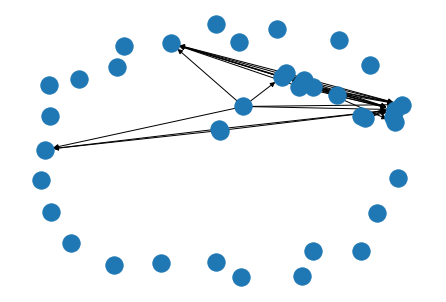

In [57]:
import matplotlib.pyplot as plt
nx.draw(G2)

In [44]:
from networkx.algorithms.approximation.vertex_cover import min_weighted_vertex_cover
vertext_cover_set_2 = min_weighted_vertex_cover(G2)
print(min_weighted_vertex_cover(G2))

{33, 34, 36, 37, 6, 9, 10, 12, 13, 16, 19, 23, 24, 27}


In [48]:
import random
val_list = list(vertext_cover_set_2)
random.shuffle(val_list)
sub_graph_2 = G2.subgraph(val_list)
print(val_list)

[10, 23, 13, 34, 27, 33, 19, 16, 24, 12, 9, 36, 6, 37]


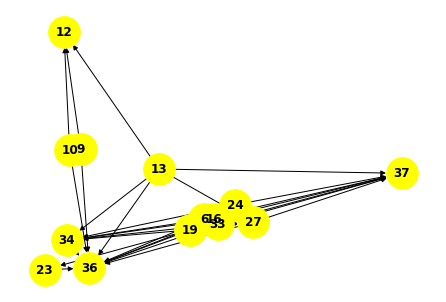

In [77]:
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 1,
    'font_weight':'bold',
    'with_labels': True
}

nx.draw(sub_graph_2,**options )


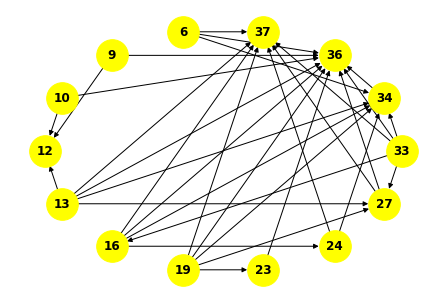

In [83]:
from networkx.drawing.nx_pylab import draw_circular
nx.draw_circular(sub_graph_2,**options )
plt.savefig("AC_graph.png")

In [46]:
#from networkx.DiGraph import in_degree
sorted_node_list_2 = []

for vertex in vertext_cover_set_2:
  #print("node"+str(vertex))
  in_degree_val = G2.in_degree(vertex)
  #print(G.in_degree(vertex))
  sorted_node_list_2.append({"node_index": vertex, "in_dgree_val" : in_degree_val}) 

sorted_node_list_2 = sorted(sorted_node_list_2, key = lambda x: x['in_dgree_val'],reverse=True)
print(sorted_node_list_2)

[{'node_index': 36, 'in_dgree_val': 14}, {'node_index': 34, 'in_dgree_val': 8}, {'node_index': 37, 'in_dgree_val': 7}, {'node_index': 27, 'in_dgree_val': 4}, {'node_index': 12, 'in_dgree_val': 3}, {'node_index': 16, 'in_dgree_val': 1}, {'node_index': 23, 'in_dgree_val': 1}, {'node_index': 24, 'in_dgree_val': 1}, {'node_index': 33, 'in_dgree_val': 0}, {'node_index': 6, 'in_dgree_val': 0}, {'node_index': 9, 'in_dgree_val': 0}, {'node_index': 10, 'in_dgree_val': 0}, {'node_index': 13, 'in_dgree_val': 0}, {'node_index': 19, 'in_dgree_val': 0}]


In [49]:
fh = open("test_AC.edgelist", "wb")
nx.write_edgelist(sub_graph_2, fh)

In [112]:
count = 0 
all_hypothesis_1 = []
while count <= int(0.25*G2.number_of_nodes()):
    print("sentence")
    sentenceObject = G2.nodes[sorted_node_list_2[count]['node_index']]
    sentence = sentenceObject['sentence']
    all_hypothesis_1.append(sentence)
    component_type = sentenceObject['component_type']
    print(sentence+ "   "+component_type)
    count += 1

sentence
In my opinion, the learned Trial Judge has rightly addressed the issue   MajorClaim
sentence
Therefore, the learned Trial Judge, in my view, has rightly observed that it is not possible to hold whether the suit is barred by the law of limitation or not   Claim
sentence
Accordingly this application is devoid of merits and is, therefore, dismissed   Premise
sentence
Fraud is to be decided on the basis of evidence   Premise
sentence
Thus, the plaintiffs became the owners of the property left by Hari Mohan   Premise
sentence
Thereafter, the defendant filed the said application which was rejected by the impugned order   Premise
sentence
So, in the instant case, as per materials on record when the matter came to the knowledge of the plaintiffs in the year 1992, it should be presumed that the suit must be filed within three years from the date of knowledge   Claim
sentence
The instant suit having been filed in the year 2010 is not maintainable and so, the suit comes within the mischi